# Mod 4 Project - Time Series

* Student name: THOMAS J WHIPPLE
* Student pace: part time student
* Scheduled project review date/time: FRIDAY, MAY 15, 2020, 10:00am
* Instructor name: ABHINEET KULKARNI
* Blog post URL:  https://medium.com/@mrtjwhipple/zillow-time-series-352ed141a4a


## Zillow Small Dataset Predictor

For this Flatiron Module 4 project, I will be forecasting real estate prices of various zip codes using data from the small Zillow dataset. I will be acting as a consultant for a fictional real-estate investment firm and need to build a time series model to justify my findings. The firm has asked me to determine:

> What are the top 5 best zip codes in the USA to invest?

# Import Necessary Libraries

In [1]:
# Below are the libraries I will use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

np.random.seed(123) 

# Load the Data

In [2]:
df = pd.read_csv("zillow_data.csv")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


## Filtering for Chosen Zipcodes  ???

In [ ]:
# Should I drop any unnecessary columns?
#df = df.drop(['RegionID', 'SizeRank'], axis = 1)
#df.head()

In [44]:
df['2018-04'].describe()

count    1.472300e+04
mean     2.880399e+05
std      3.720544e+05
min      1.380000e+04
25%      1.324000e+05
50%      1.981000e+05
75%      3.211000e+05
max      1.789490e+07
Name: 2018-04, dtype: float64

In [3]:
new_df = df.drop(['RegionID','RegionName','State','Metro','CountyName','SizeRank'], axis=1)
new_df.head()

,City,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,Chicago,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,McKinney,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,Katy,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,Chicago,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,El Paso,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
# Get a series containing maximum value of each row
maxValuesObj = new_df.max(axis=1)
 
print('Maximum value in each row : ')
print(maxValuesObj)

Maximum value in each row : 
0        1033800.0
1         321800.0
2         330000.0
3        1308500.0
4         132300.0
           ...    
14718     218600.0
14719     231700.0
14720     133400.0
14721     706400.0
14722     452500.0
Length: 14723, dtype: float64


In [5]:
# Get a series containing minimum value of each row
minValuesObj = new_df.min(axis=1)
 
print('Minimum value in each row : ')
print(minValuesObj)

Minimum value in each row : 
0        334200.0
1        186900.0
2        191800.0
3        494700.0
4         77300.0
           ...   
14718     92600.0
14719     87100.0
14720     57100.0
14721    191100.0
14722    175800.0
Length: 14723, dtype: float64


In [6]:
new_df['Sales_Diff'] = new_df.apply(lambda row: row.max() - row.min(), axis = 1) 

TypeError: ("'>=' not supported between instances of 'str' and 'float'", 'occurred at index 0')

In [52]:
new_df.Sales_Diff.describe()

count    1.472300e+04
mean     1.891627e+05
std      2.864112e+05
min      5.200000e+03
25%      6.490000e+04
50%      1.152000e+05
75%      2.159000e+05
max      1.071380e+07
Name: Sales_Diff, dtype: float64

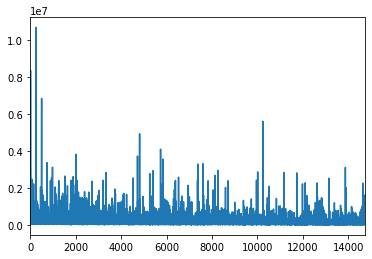

In [56]:
figsize = (12,6)
new_df.Sales_Diff.plot()

# Cleaning the Data

In [4]:
# Check for nulls?
df.isnull().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [7]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


## Reshape from Wide to Long Format

In [8]:
melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City',
                                  'State', 'Metro', 'CountyName'], var_name='time')

In [9]:
melted.head()

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,time,value
0,60657,84654,1,Chicago,IL,Chicago,Cook,1996-04,334200.0
1,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,1996-04,235700.0
2,77494,91982,3,Katy,TX,Houston,Harris,1996-04,210400.0
3,60614,84616,4,Chicago,IL,Chicago,Cook,1996-04,498100.0
4,79936,93144,5,El Paso,TX,El Paso,El Paso,1996-04,77300.0


In [10]:
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3901595 entries, 0 to 3901594
Data columns (total 9 columns):
RegionName    int64
RegionID      int64
SizeRank      int64
City          object
State         object
Metro         object
CountyName    object
time          object
value         float64
dtypes: float64(1), int64(3), object(5)
memory usage: 267.9+ MB


In [11]:
melted.time.describe()

count     3901595
unique        265
top       2016-11
freq        14723
Name: time, dtype: object

In [12]:
melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)

In [33]:
melted.time.describe()

count                 3901595
unique                    265
top       2017-04-01 00:00:00
freq                    14723
first     1996-04-01 00:00:00
last      2018-04-01 00:00:00
Name: time, dtype: object

In [34]:
melted = melted.dropna(subset=['value'])

In [35]:
melted.head()

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,time,value
0,60657,84654,1,Chicago,IL,Chicago,Cook,1996-04-01,334200.0
1,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0
2,77494,91982,3,Katy,TX,Houston,Harris,1996-04-01,210400.0
3,60614,84616,4,Chicago,IL,Chicago,Cook,1996-04-01,498100.0
4,79936,93144,5,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0


In [36]:
melted.describe()

,RegionName,RegionID,SizeRank,value
count,3.744704e+06,3.744704e+06,3.744704e+06,3.744704e+06
mean,4.800889e+04,8.101695e+04,7.243785e+03,2.076064e+05
std,2.959375e+04,3.225436e+04,4.237746e+03,2.400207e+05
min,1.001000e+03,5.819600e+04,1.000000e+00,1.130000e+04
25%,2.163500e+04,6.695300e+04,3.572000e+03,9.790000e+04
50%,4.582700e+04,7.792000e+04,7.179000e+03,1.476000e+05
75%,7.547300e+04,9.104500e+04,1.088300e+04,2.372000e+05
max,9.990100e+04,7.538440e+05,1.472300e+04,1.931490e+07


In [37]:
melted.set_index('time', inplace=True)

In [38]:
melted.head()

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,value
time,,,,,,,,
1996-04-01,60657,84654,1,Chicago,IL,Chicago,Cook,334200.0
1996-04-01,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,235700.0
1996-04-01,77494,91982,3,Katy,TX,Houston,Harris,210400.0
1996-04-01,60614,84616,4,Chicago,IL,Chicago,Cook,498100.0
1996-04-01,79936,93144,5,El Paso,TX,El Paso,El Paso,77300.0


In [39]:
melted.value.describe()

count    3.744704e+06
mean     2.076064e+05
std      2.400207e+05
min      1.130000e+04
25%      9.790000e+04
50%      1.476000e+05
75%      2.372000e+05
max      1.931490e+07
Name: value, dtype: float64

In [41]:
melted.value.max()

19314900.0

In [42]:
# Look for rows that are more than three standard deviations above the mean
value_high = melted.value.mean() + melted.value.std()*3
value_high
# Count how many rows are outliers
print("Number of outliers:", melted.value[melted['value'] > value_high].count())

Number of outliers: 45094


In [43]:
melted[melted['value'] > 19000000]

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,value
time,,,,,,,,
2016-09-01,10021,61635,273,New York,NY,New York,New York,19082200.0
2016-10-01,10021,61635,273,New York,NY,New York,New York,19314900.0
2016-11-01,10021,61635,273,New York,NY,New York,New York,19282600.0
2016-12-01,10021,61635,273,New York,NY,New York,New York,19103000.0
2017-04-01,10021,61635,273,New York,NY,New York,New York,19056700.0
2017-05-01,10021,61635,273,New York,NY,New York,New York,19215000.0
2017-06-01,10021,61635,273,New York,NY,New York,New York,19128600.0


In [ ]:
melted[melted.value > melted.value.mean() + 60*melted.value.std()]

In [ ]:
melted.value.min()

In [ ]:
#melted.plot(figsize=(16,6))
#plt.xlabel('time', fontsize=14);

In [ ]:
melted.info()

In [62]:
ts_df = melted[['value','RegionName']]

In [63]:
ts_df.head()

,value,RegionName
time,,
1996-04-01,334200.0,60657
1996-04-01,235700.0,75070
1996-04-01,210400.0,77494
1996-04-01,498100.0,60614
1996-04-01,77300.0,79936


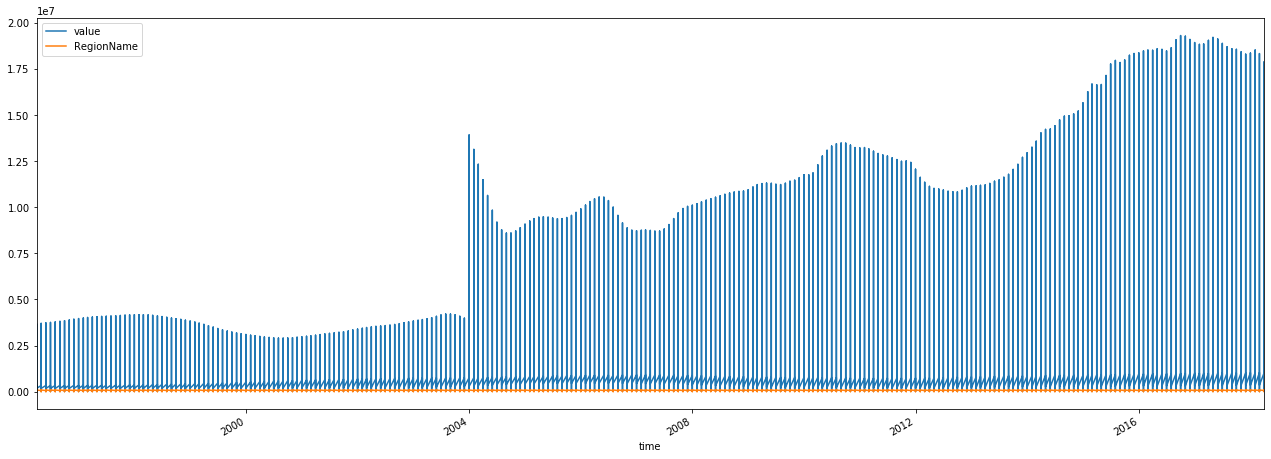

In [69]:
# Draw a line plot 
ts_df.plot(figsize = (22,8))
plt.show()

In [ ]:
melted.plot(figsize=(16,6))
plt.xlabel('time', fontsize=14);

In [64]:
grouped = melted.groupby('time').aggregate({'value':'mean'})
grouped.head()

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312


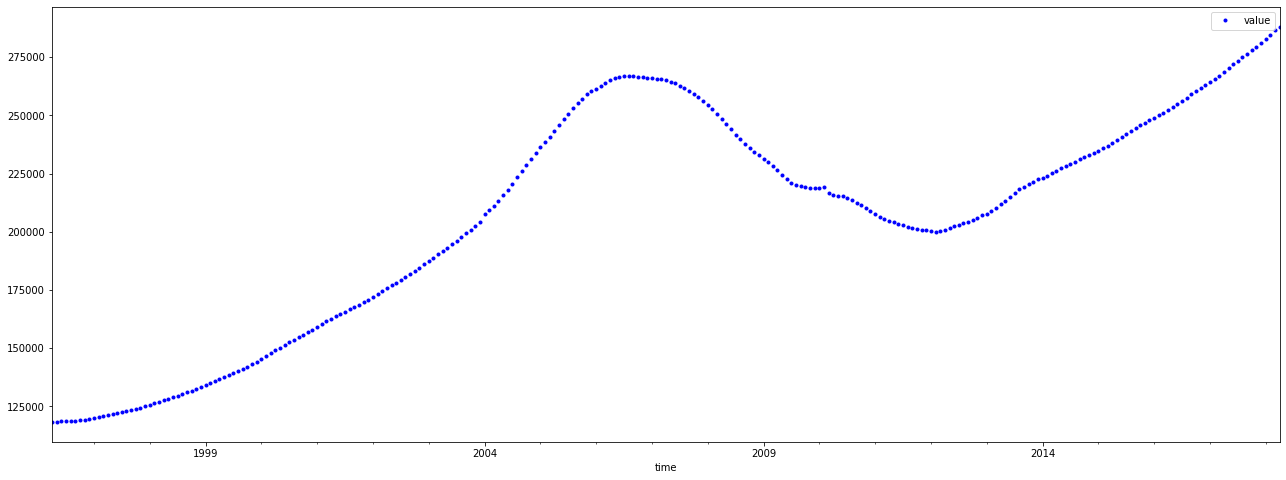

In [71]:
# Draw a line plot 
grouped.plot(figsize = (22,8), style = 'b.')
plt.show()

# Data Preprocessing

get_datetimes(), a function to deal with converting the column values for datetimes as a pandas series of datetime objects Some good parameters for matplotlib to help make your visualizations more readable. Good luck!

In [18]:
melted.head()

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,time,value
0,60657,84654,1,Chicago,IL,Chicago,Cook,1996-04-01,334200.0
1,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0
2,77494,91982,3,Katy,TX,Houston,Harris,1996-04-01,210400.0
3,60614,84616,4,Chicago,IL,Chicago,Cook,1996-04-01,498100.0
4,79936,93144,5,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0


In [65]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [67]:
# Not working...
# another_df = get_datetimes(melted)

# EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# ARIMA Modeling

# Interpreting Results

# Conclusion and Recommendation